#### Contents

##### 01 Import libraries and data
##### 02 Train the algorithm
##### 03 Run KNN with 1 to 4 neighbors
##### 04 Run KNN with 1 to 10 neighbors
##### 05 Run KNN with 1 to 20 neighbors
##### 06 Run KNN with 1 to 30 neighbors

#### 01 Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [3]:
#create path

path = r'/Users/Owner/Documents/CareerFoundry/Machine Learning Specialization/Data Sets'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, 'temperature_scaled.csv'), index_col = False)

In [5]:
df.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [6]:
df.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max','ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean','TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1, inplace=True)

In [7]:
column_names = df.columns

In [8]:
column_names_list = df.columns.tolist()

In [9]:
print(column_names)
print(column_names_list)


Index(['DATE', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=148)
['DATE', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAP

In [10]:
#import other data set
df_2 = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [11]:
df_2.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

#### 02 Train the algorithm

In [13]:
#Create a matrix by dropping the unneeded columns.
X = df.drop(['DATE'], axis=1)
y = df_2.drop (['DATE'], axis=1)

In [14]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [15]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


#### 03 Run KNN with 1 to 4 neighbors

In [18]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

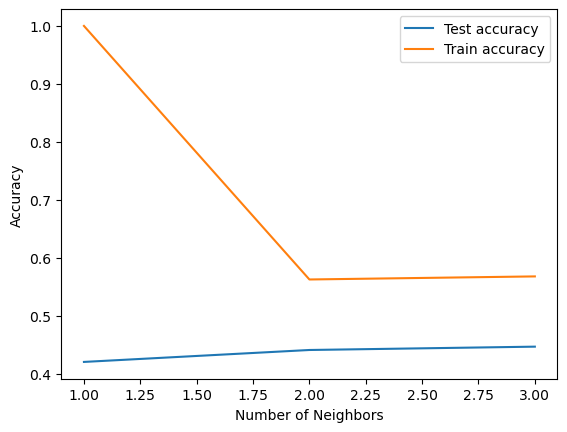

In [19]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [20]:
#What is the testing accuracy score? Using the cross validation method
# y_pred_test = df_2.predict(X_test)
# print('Test accuracy score: ',cross_val_score(df_2, X_test, y_test, cv = 3, scoring='accuracy').mean())
print(y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


In [21]:

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


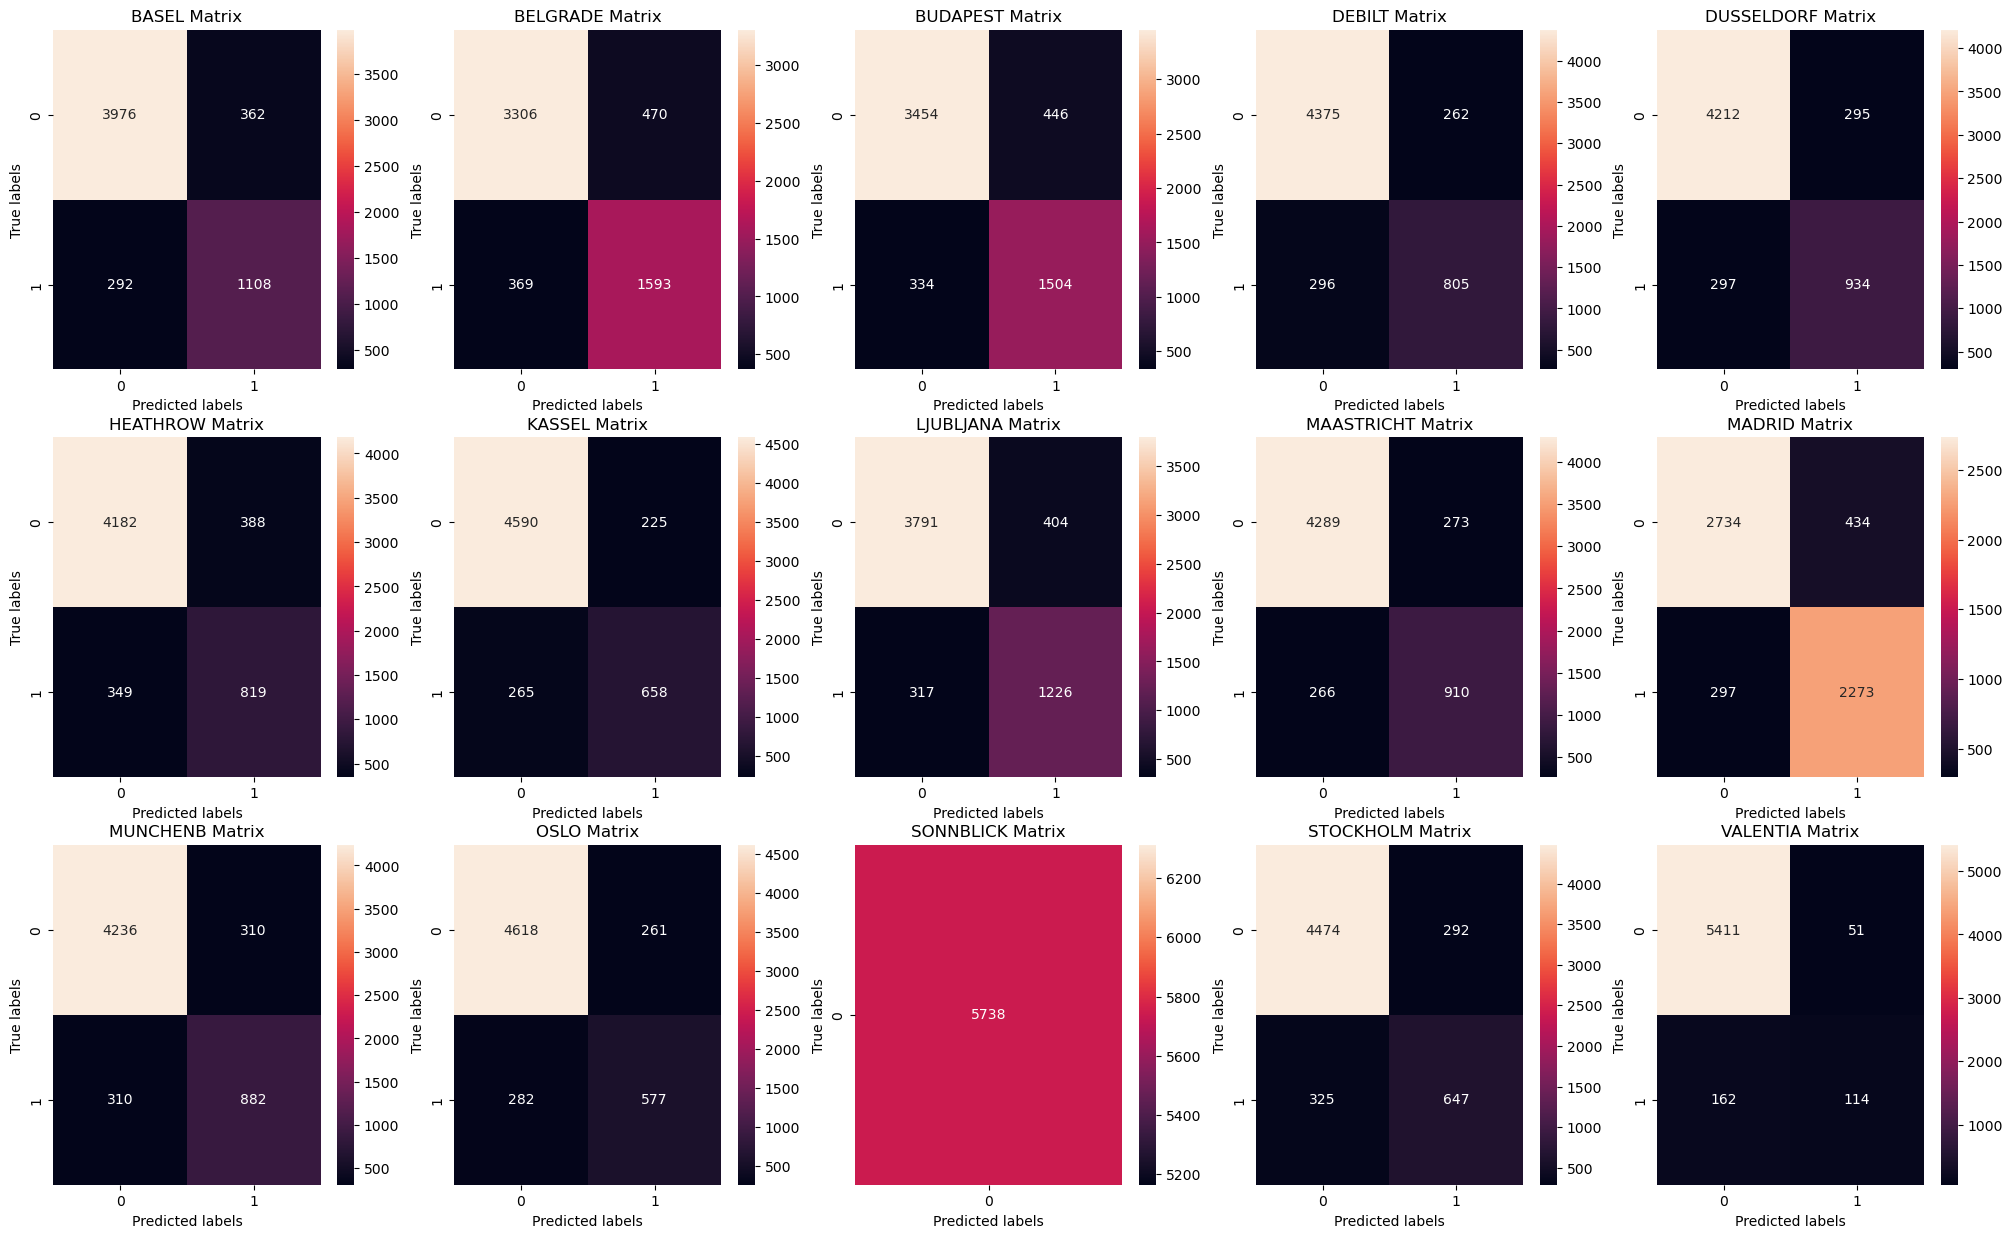

In [22]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### 04 Run KNN with 1 to 10 neighbors

In [23]:
#Run the model with neighbors equal to 1 to 10, test the accuracy
k_range = np.arange(1,10)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3 4 5 6 7 8 9]
i - 1
k - [1 2 3 4 5 6 7 8 9]
i - 2
k - [1 2 3 4 5 6 7 8 9]
i - 3
k - [1 2 3 4 5 6 7 8 9]
i - 4
k - [1 2 3 4 5 6 7 8 9]
i - 5
k - [1 2 3 4 5 6 7 8 9]
i - 6
k - [1 2 3 4 5 6 7 8 9]
i - 7
k - [1 2 3 4 5 6 7 8 9]
i - 8
k - [1 2 3 4 5 6 7 8 9]


<function matplotlib.pyplot.show(close=None, block=None)>

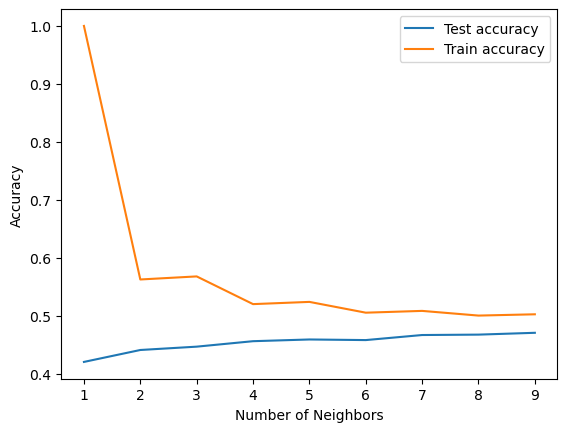

In [24]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


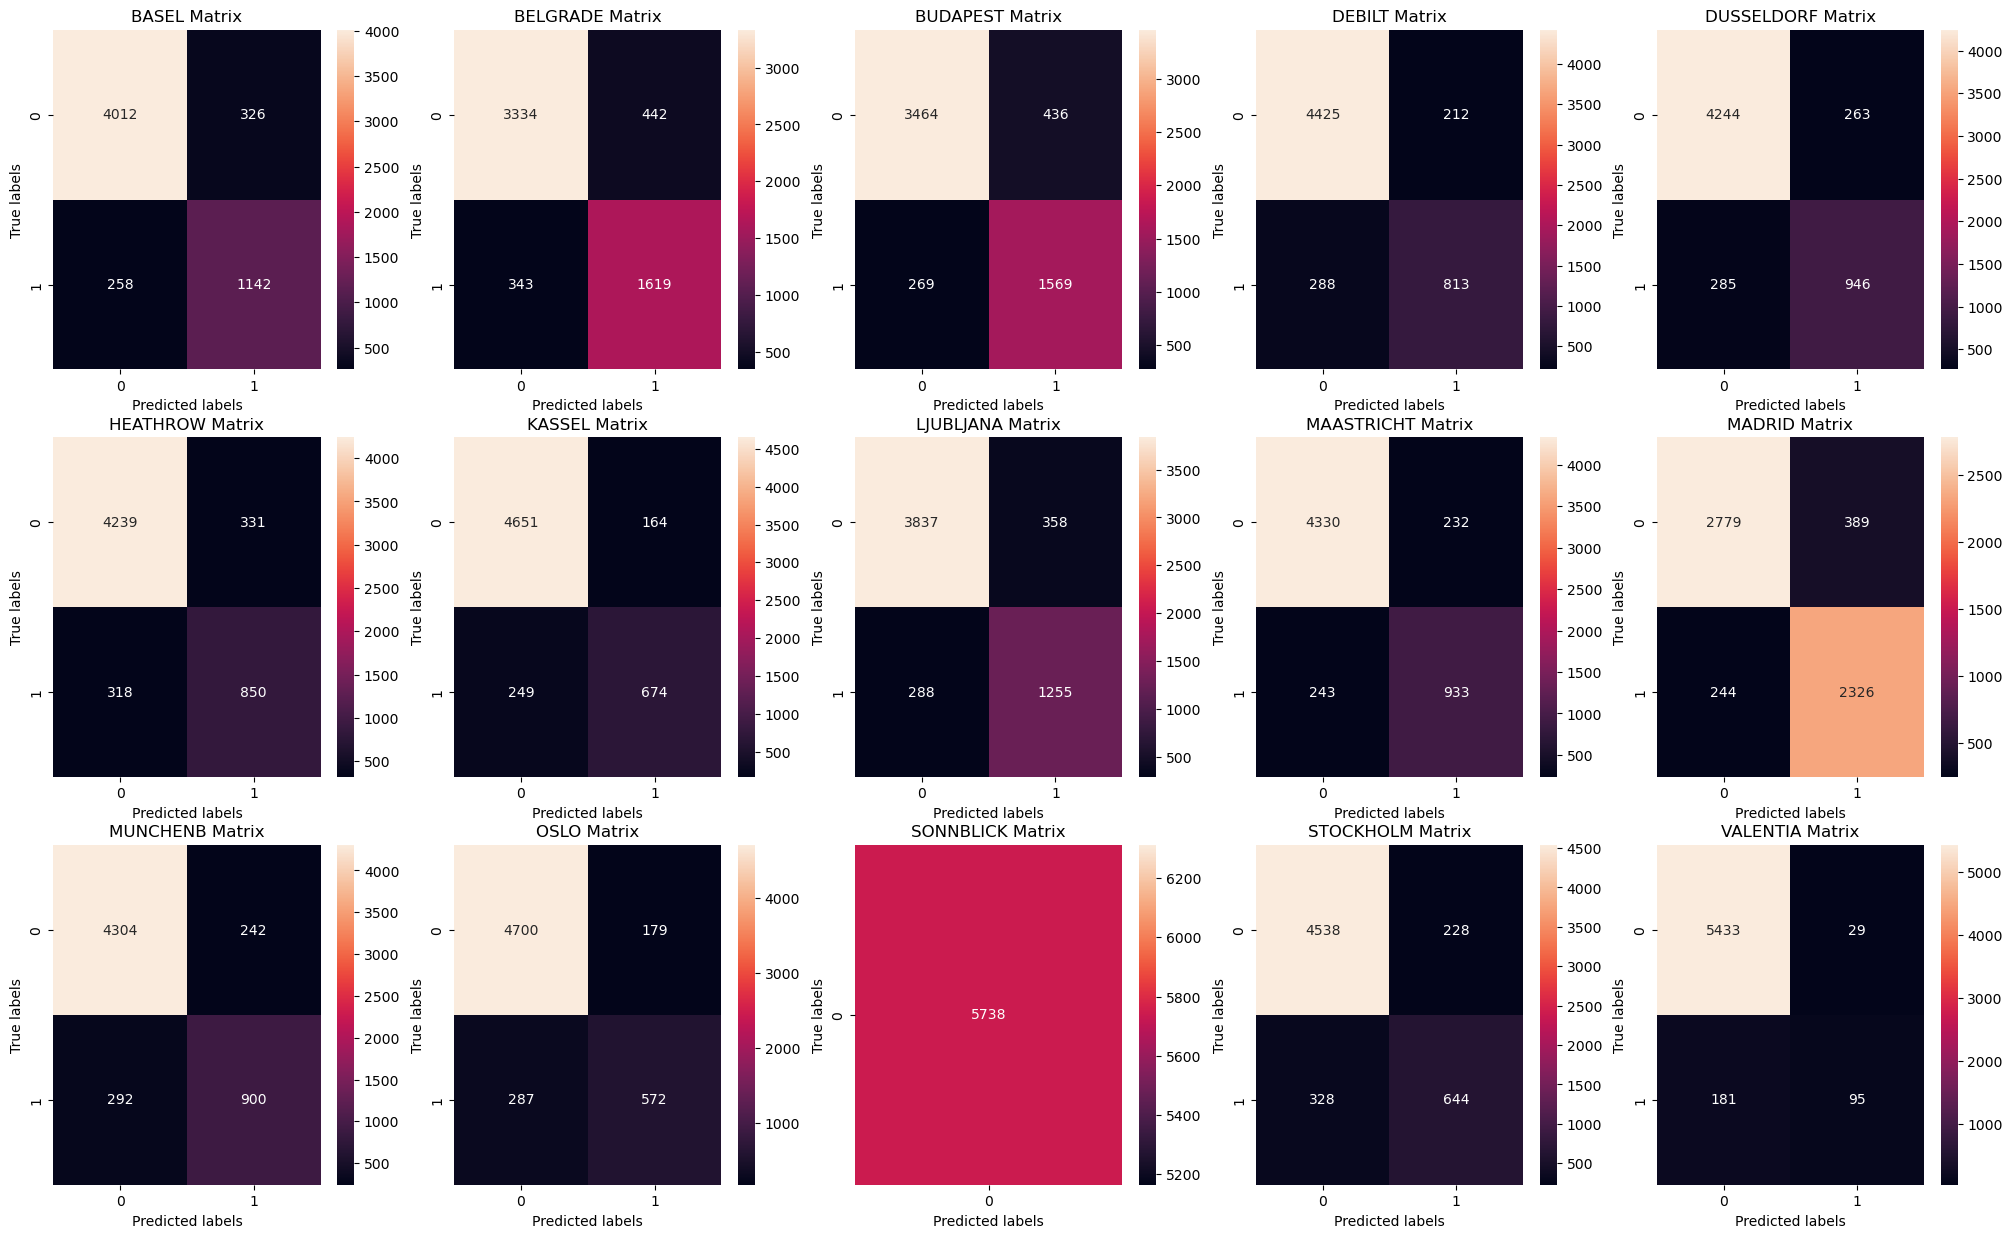

In [25]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### 05 Run KNN with 1 to 20 neighbors

In [26]:
#Run the model with neighbors equal to 1 to 20, test the accuracy
k_range = np.arange(1,20)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 1
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 2
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 3
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 4
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 5
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 6
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 7
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 8
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 9
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 10
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 11
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 12
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 13
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
i - 14
k - [ 1  2  3  4  5  6 

<function matplotlib.pyplot.show(close=None, block=None)>

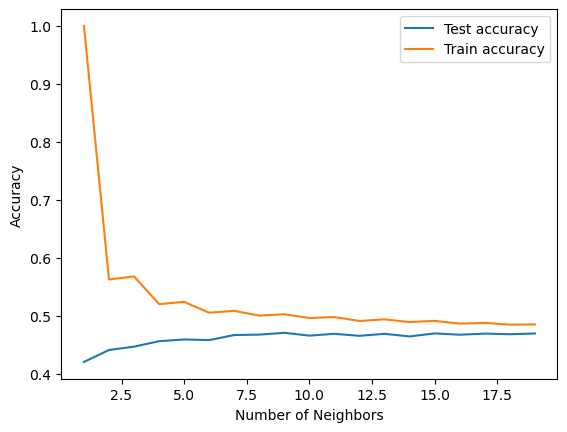

In [27]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


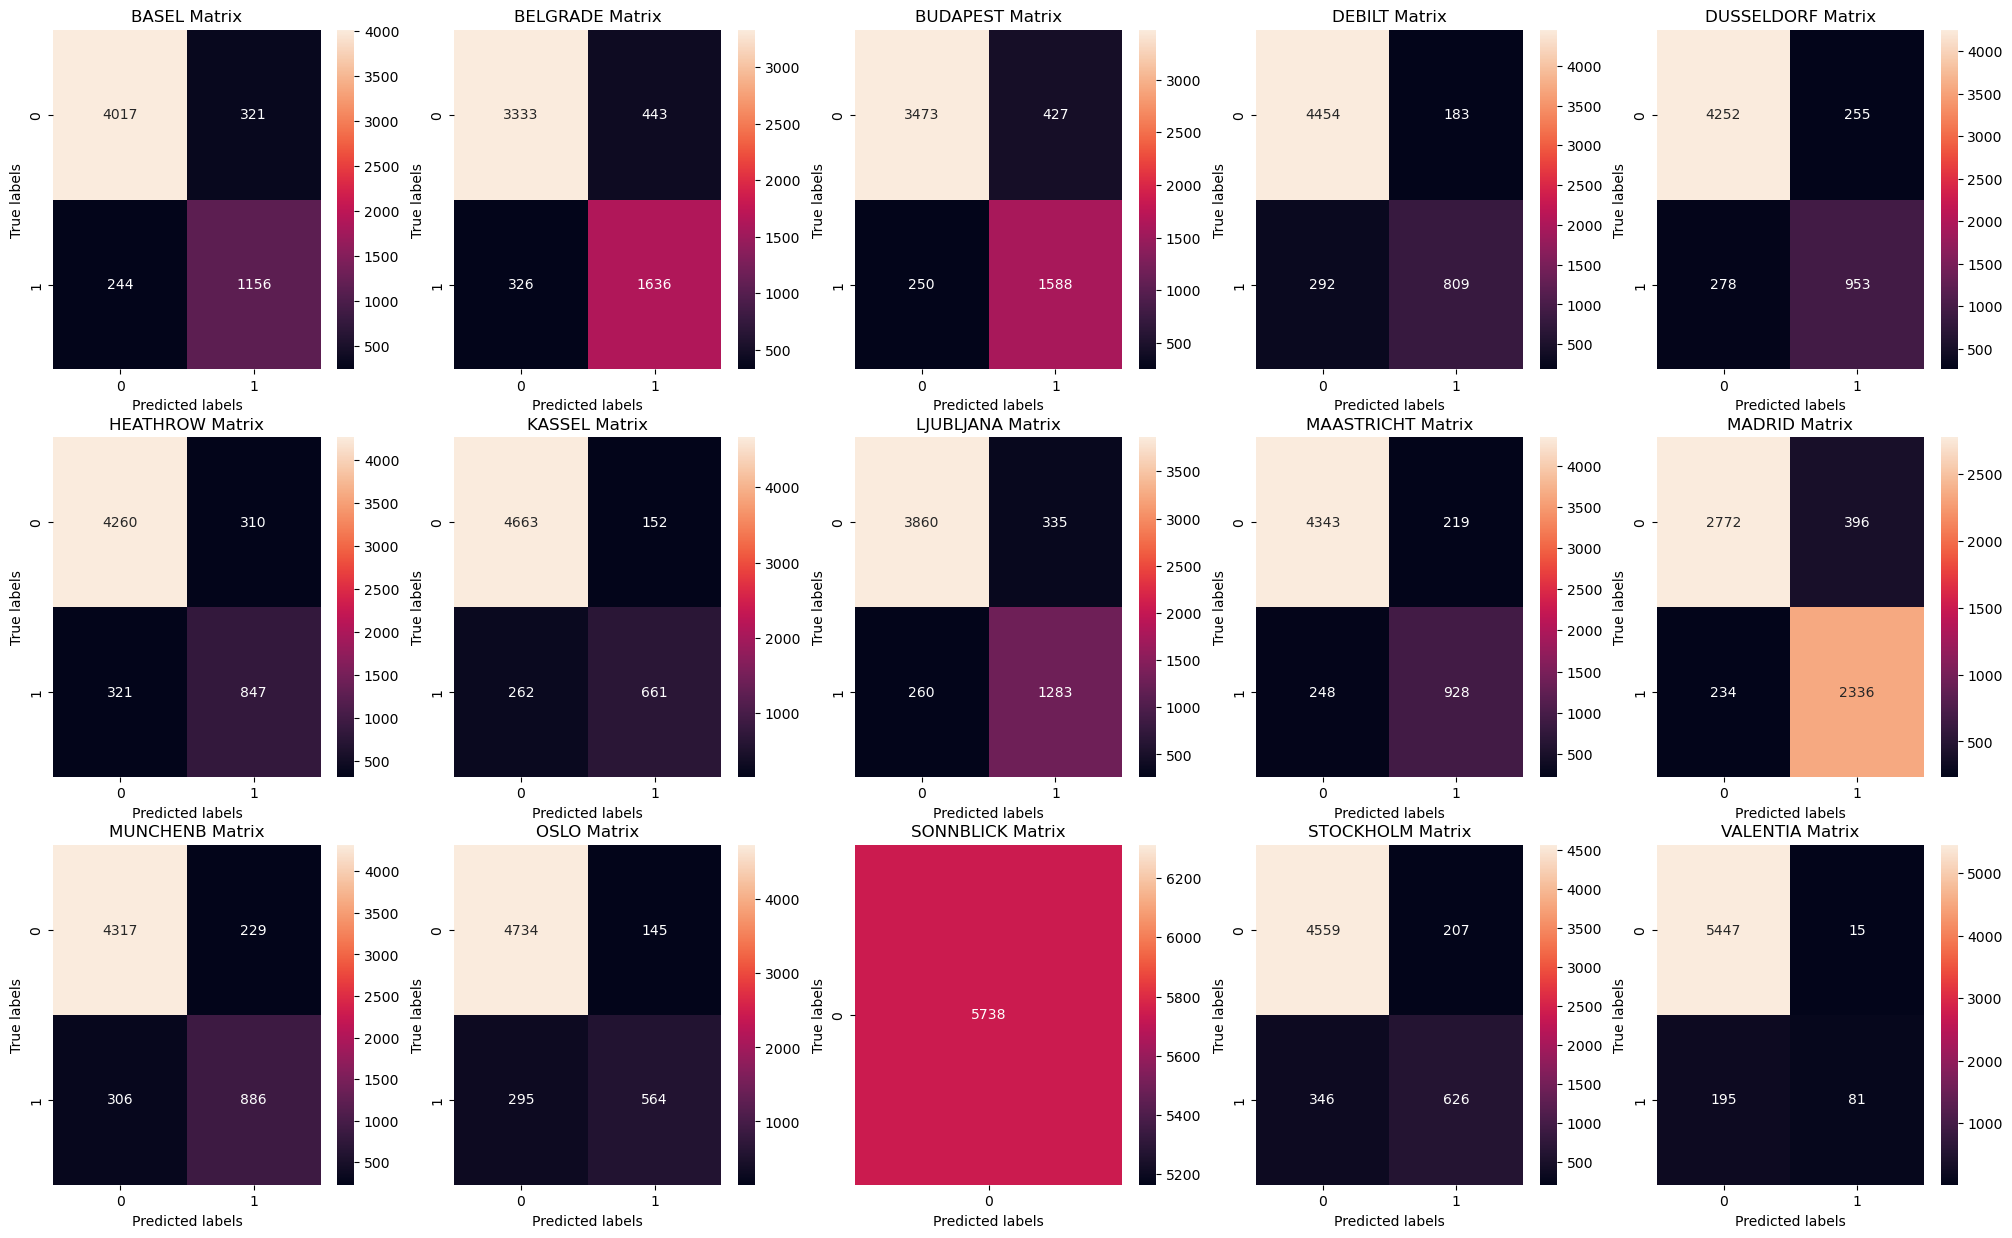

In [28]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### 06 Run KNN with 1 to 30 neighbors

In [29]:
#Run the model with neighbors equal to 1 to 30, test the accuracy
k_range = np.arange(1,30)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 1
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 2
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 3
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 4
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 5
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 6
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 7
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 8
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 9
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [61]:
# Assuming test_acc and train_acc are lists of accuracy values
for k, test_accuracy, train_accuracy in zip(k_range, test_acc, train_acc):
    print(f'k={k}: Test accuracy = {test_accuracy:.2f}, Train accuracy = {train_accuracy:.2f}')

k=1: Test accuracy = 0.42, Train accuracy = 1.00
k=2: Test accuracy = 0.44, Train accuracy = 0.56
k=3: Test accuracy = 0.45, Train accuracy = 0.57
k=4: Test accuracy = 0.46, Train accuracy = 0.52
k=5: Test accuracy = 0.46, Train accuracy = 0.52
k=6: Test accuracy = 0.46, Train accuracy = 0.51
k=7: Test accuracy = 0.47, Train accuracy = 0.51
k=8: Test accuracy = 0.47, Train accuracy = 0.50
k=9: Test accuracy = 0.47, Train accuracy = 0.50
k=10: Test accuracy = 0.47, Train accuracy = 0.50
k=11: Test accuracy = 0.47, Train accuracy = 0.50
k=12: Test accuracy = 0.47, Train accuracy = 0.49
k=13: Test accuracy = 0.47, Train accuracy = 0.49
k=14: Test accuracy = 0.46, Train accuracy = 0.49
k=15: Test accuracy = 0.47, Train accuracy = 0.49
k=16: Test accuracy = 0.47, Train accuracy = 0.49
k=17: Test accuracy = 0.47, Train accuracy = 0.49
k=18: Test accuracy = 0.47, Train accuracy = 0.49
k=19: Test accuracy = 0.47, Train accuracy = 0.49
k=20: Test accuracy = 0.47, Train accuracy = 0.48
k=21: Tes

<function matplotlib.pyplot.show(close=None, block=None)>

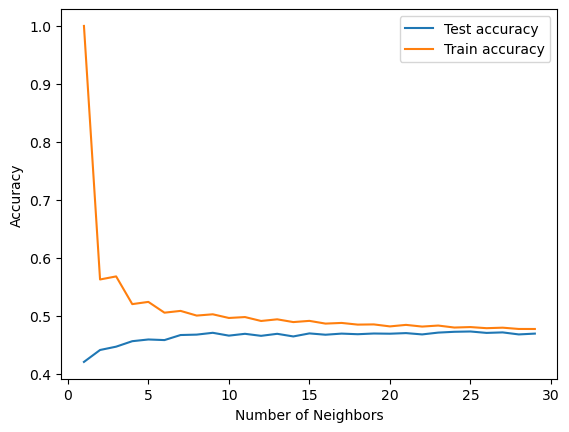

In [30]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


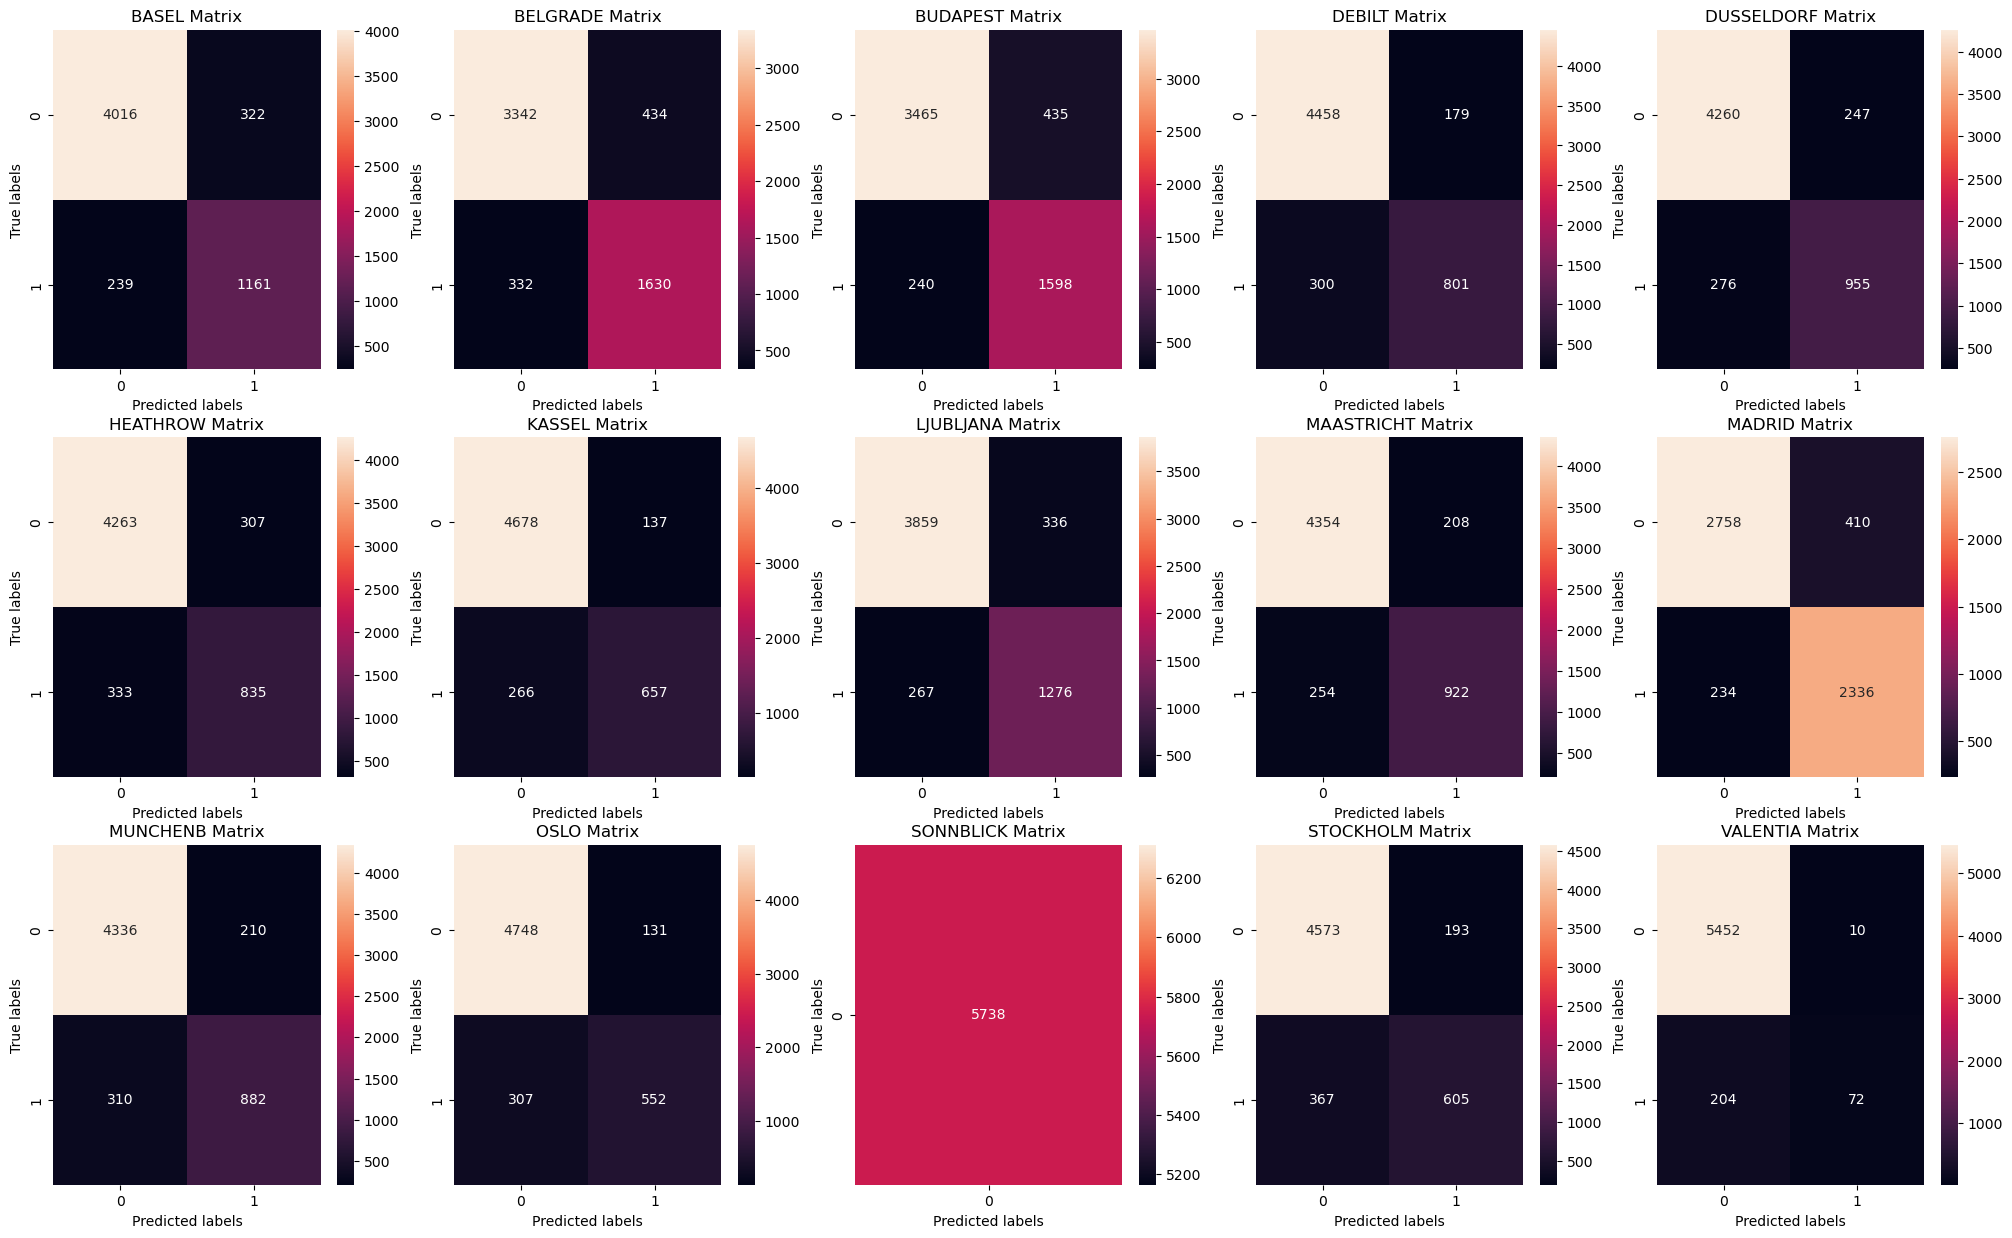

In [31]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1